# Планирование рекламной компании интернет-магазина игр

Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
Наша задача — выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
У нас есть данные до 2016 года. Нужно определить принцип работы с данными.

Основными этапами нашего проекта станут:  
* Изучение предоставленных данных
* Предобработка данных. Расчеты и добавление необходимых для анализа результатов
* Анализ данных
* Составление информационного портрета пользователя каждого региона
* Проверка гипотез
* Формулирование общего вывода

Проект выполнен в **Jupyter Notebook**, версия сервера блокнотов: 6.1.4. Версия **Python** 3.7.8.  
В проекте использованы библиотеки:  
* **Pandas**
* **MatPlotLib** 
* **NumPy**
* **Math**
* **SciPy** 
* **IPython**

## Изучение предоставленных данных

In [1]:
# Импортируем библиотеки и модули, которые 
# пригодятся нам для выполнения проекта.
import math as mt
from math import factorial

import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats as st
# Прочитаем файл.
data = pd.read_csv('/datasets/games.csv')
data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Вывод

Перед нами таблица с данными о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Представлены данные по 2016 год включительно.  
Таблица имеет 11 столбцов и 16715 строк.  
В 6 столбцах хранится вещественный тип данных `float64`:  
* _Year_of_Release (год выпуска игры)_
* _NA_sales (продажи в Северной Америке), млн копий_
* _EU_sales (продажи в Европе), млн копий_
* _JP_sales (продажи в Японии), млн копий_
* _Other_sales (продажи в других странах), млн копий_
* _Critic_Score (оценка критиков), максимум 100_  
  
В 5 столбцах &mdash; текстовый или смешанный тип данных `object`:  
* _Name (название игры)_
* _Platform (название игровой платформы)_
* _Genre (название жанра игры)_
* _User_Score (оценка пользователей), максимум 10_
* _Rating (рейтинг от организации ESRB)_  
  
**Сформулируем идеи для предобработки данных и расчетов дополнительных данных:**  
  
* Необходимо заменить названия столбцов, приведя их к нижнему регистру. Хранить названия столбцов с прописными буквами в данном случае однозначно неудобно и нецелесообразно.
* Проверим всю таблицу на наличие полных дубликатов, затем проверим отдельно столбец _Name_
* Изучим таблицу на предмет пропусков и примем решение, обрабатывать ли их, и если да, то как. Пропуски зафиксированы в столбцах _Name_, _Year_of_Release_, _Genre_, _Critic_Score_, _User_Score_, _Rating_.
* Если удастся обработать пропуски, преобразуем тип данных в столбце _Year_of_Release_ (нет смысла хранить дату в формате `float`). Проведем исследование столбца _Critic_Score_: возможно оценка критиков не имеет долей и не нуждается в формате float (поменяем формат, если удастся избавиться от `NaN`-значений). Необходимо изучить `tbd`-значения в столбце _User_Score_ и принять решение по их обработке. После обработки рассмотреть возможность перевода типа данных столбца _User_Score_ из object в `float`.
* Очевидно, что необходимо посчитать суммарные продажи каждой игры во всех регионах. Посчитаем и добавим в новый столбец.



## Предобработка данных. Расчеты и добавление необходимых для анализа результатов

In [2]:
# Приведем названия столбцов к нижнему регистру.
data.columns = data.columns.str.lower()

In [3]:
# Проверим таблицу на наличие полных дубликатов.
print('Количество полных дубликатов:', data.duplicated().sum())
# Проверим столбец name на наличие дубликатов.
data['name'].value_counts()

Количество полных дубликатов: 0


Need for Speed: Most Wanted    12
Madden NFL 07                   9
FIFA 14                         9
LEGO Marvel Super Heroes        9
Ratatouille                     9
                               ..
Battle Fantasia                 1
Gallop Racer (JP)               1
Black Cat                       1
U-Sing: Girls Night             1
Imagine: Teacher                1
Name: name, Length: 11559, dtype: int64

Встречаются строки с одинаковыми значениями в столбце *name*, но при детальном рассмотрении cтановится ясно, что эти строки отражают одну и ту же игру на разных платформах или её переиздание. Обрабатывать такие дубликаты не нужно.


In [4]:
# Рассмотрим пропуски. Начнем со столбца name.
data.loc[data['name'] != data['name']]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце *name* есть два пропуска. Эти строки можно было бы оставить (*name* не самый важный для анализа столбец). Но отсутствие данных в столбцах *genre*, *critic_score*, *user_score*, *rating* делает эти строки малоинформативными. Принимаем решение удалить их.

In [5]:
# Удалим пропуски в столбце name.
data = data.dropna(subset=['name']).reset_index(drop=True)
# Пропуски остаются только в столбцах year_of_release, 
# critic_score, user_score, rating.
# Рассмотрим столбец year_of_release. Обрабатывать пропуски не будем.
data.loc[data['year_of_release'] != data['year_of_release']]
# Рассмотрим столбец critic_score. 
# Обрабатывать пропуски в этом столбце и, судя по всему
# в столбце rating, не будем.
data.loc[data['critic_score'] != data['critic_score']]
# Рассмотрим столбец user_score.
data.loc[data['user_score'] != data['user_score']]
data.loc[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16695,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16696,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16702,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Корректно заполнить `NaN`-значения не получится, удалять их нельзя. А вот tbd-значения заменим на `NaN`, чтобы была возможность проводить математические операции со столбцом. `tbd` - это to be determined/decided. По смыслу `tbd` - это в данном случае то же, что и `NaN`.

In [6]:
# Приведем столбец user_score к вещественному типу, 
# попутно заменяя tbd-значения на NaN.
data['user_score'] = pd.to_numeric(
    data['user_score'], 
    errors='coerce'
)
# Посчитаем суммарные продажи каждой игры.
data['sales_total'] = (
    data['na_sales'] + 
    data['eu_sales'] + 
    data['jp_sales'] + 
    data['other_sales']
)
# Посчитаем суммарные продажи во всех регионах.
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
region_sales = []
for region in regions:
    region_sales.append(data[region].sum())
total_sales_by_region = pd.Series(region_sales, index=regions)
display(total_sales_by_region)

na_sales       4400.57
eu_sales       2424.14
jp_sales       1297.34
other_sales     791.24
dtype: float64

In [7]:
# Удалим строку 15955. В ней указан год выхода игры 1985 на платформе DS. 
# Это невозможно: Nintendo DS вышла в 2004 году.
display(data.query('platform == "DS" and year_of_release == 1985'))
data = data.drop(15955).reset_index(drop=True)
# Поменяем формат столбца year_of_release с float64 на Int64.
data['year_of_release'] = data['year_of_release'].astype('Int64')
display(data)
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
15955,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16708,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16709,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  sales_total      16712 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


### Вывод

Мы совершили предобработку данных и добавили необходимые данные в таблицу.  
1. **Названия столбцов**  
Названия столбцов таблицы содержали строчные буквы. Предположилетельно это случилось, так как автор-компилятор этой таблицы не придал значения регистру букв в названиях столбцов. В нашем случае нет смысла в записи названий столбцов строчными буквами. Такой формат записи имен столбцов неудобен и может породить ошибки в записи кода в будущем. Мы привели названия всех столбцов к нижнему регистру.  
2. **Дубликаты**  
* Мы проверили таблицу на наличие полных дубликатов. Полные дубликаты в таблице отсутствуют.  
* Также мы отдельно проверили столбец _name_ на наличие дубликатов. Встречаются строки с одинаковыми значениями в столбце *name*, но при детальном рассмотрении становится ясно, что эти строки отражают одну и ту же игру на разных платформах, или её переиздание. Обрабатывать такие дубликаты не нужно, так как несмотря на одно и то же название игры, каждая такая строка несет в себе уникальную информацию, уникальный релиз игры.  
3. **Пропуски**  
* Мы изучили пропуски в таблице. В столбце _name_ имеются два `NaN`-значения. Речь идет о двух играх платформы GEN (Sega Genesis). Причина, по которой оказались утеряны названия игр неизвестна. По большому счету их можно было бы и не обрабатывать, так как столбец _name_ очевидно не является столь важным для дальнейшего анализа. Скажем, вполне можно было бы представить, что NaN - это название игры и анализировать эти строки. Однако эти строки отличает от других то, что большинство их столбцов также имеют NaN-значения, и эти столбцы являются критически важными для дальнейшего анализа (речь идет о столбцах _critic_score_, _user_score_, _rating_). Причиной, по которой в этих столбцах остутствуют значения, вероятно, является отсутствие ведения какой-либо системы оценок компьютерных игр критиками и пользователями. Или невысокая популярность игры/тираж игры. А ESRB была основана 16 сентября 1994 г., что объясняет отсутствие ESRB-рейтинга у данных игр. Учитывая эти факты, а также не самые высокие показатели продаж во всех регионах, мы приняли решение избавиться от этих двух строк.  
* Мы изучили пропуски в столбце _year_of_release_. Таких строк всего 269. Вероятно, эти пропуски появились ввиду отсутствия этой информации у автора-комплиятора таблицы. Первоначальной идеей было написать функцию, определяющую наличие года (в численном виде) в названии игры и переносящее его в столбец _year_of_release_. Эту идею пришлось отбросить, так как нередко год, указанный в названии игры, не является годом выпуска игры. Например, игра Madden NFL 2004 была выпущена в 2003 году (это вообще характерно для спортивных симуляторов). А игра The Order 1888 по понятным причинам была выпущена не в 1888 году. Заменять эти пропуски автоматическим образом невозможно (только если вручную, вооружившись поисковой системой, а удалять нецелесообразно (эти строки богаты данными, необходимыми для анализа).
* После удаления двух `NaN`-значений в столбце _name_ пропусков в столбце _genre_ больше нет.
* Обрабатывать `NaN`-значения в столбцах _critic_score_, _user_score_ и _rating_ мы не будем. Как уже было сказано выше, вероятнее всего, в этих столбцах остутствуют значения ввиду отсутствия ведения какой-либо системы оценок компьютерных игр критиками и пользователями. Или невысокая популярность игры/тираж игры. А ESRB была основана 16 сентября 1994 г., что объясняет отсутствие ESRB-рейтинга у многих игр. Корректно заменить `NaN`-значения в этих столбцах не получится, так как нам не на что опереться для подбора подходящего значения. Говоря об оценках критиков и пользователей мы не можем подобрать знечение на замену, так как мы не можем корректно самостоятельно оценить игру (недавнюю и уж тем более старую) за критиков, за пользователей, за ESRB. Само по себе оценивание носит субъективный характер. Также небольшое количество продаж не говорит о том, что игра плохая и у неё должен быть небольшой рейтинг, как и большое количество продаж не говорит о том, что игра великолепная. В качестве аналогии мы можем взять музыкальный бизнес. В мире существуют тысячи потрясающих музыкальных альбомов, не знавших мировой/локальной славы, не знавших оценок критиков. О них мы и большинство человечества никогда не узнаем, если не будем "диггерами", безудержно блуждающими по блошиным рынкам мира в поисках "потерянных сокровищ музыкальной индустрии". Тем не менее, благодаря таким "диггерам", мы можем послушать такие редчайшие произведения на YouTube, и убедиться в их красоте, задавая себе вопрос: "Почему эта песня не стала мировым хитом?". Много различных факторов повлияли на неизвестность этих произведений. Рискнем предположить, что с играми такая же история. Не будем взваливать на свои плечи ответственность за присваивание рейтинга играм по каким-либо категоральным признакам. Чтобы не исказить результаты исследования, принимаем решение не обрабатывать пропуски в этих столбцах.
* В столбце _user_score_ имеются `object`-значения `tbd`. Из-за них весь столбец имеет формат `object`, что означает, что мы не можем проводить математические операции с данным столбцом. `Tbd` означает to be decided или to be determined ("предстоит решить" или "предстоит определить"). В данном случае `tbd` эквиваленты `NaN`, поэтому мы приняли решение заменить их на `NaN` с целью приведения столбца к формату `float`.  
4. **Изменение формата данных**  
* Мы изменили формат столбца _year_of_release_ с float64 на `Int64`. Теперь годы выпуска игр отображаются без плавающей запятой.
* После замены `tbd` на `NaN` формат столбца _user_score_ всё равно остался `object`. Мы перевели тип данных столбца в вещественный, используя метод `pd.to_numeric()`.
* Несмотря на то, что в столбце _critic_score_ все числа фактически являются целыми, они приведены в вещественном виде, и перевести их в формат целого числа не получится, так как в столбце имеются `NaN`-значения.  
5. **Ошибки в данных**  
В строке 15955 указана информация об игре Strongest Tokyo University Shogi DS. В качестве платформы указана DS (Nintendo DS). Судя по всему, это ошибка, так как DS вышла на рынок в 2004 году. Принятно решение удалить эту строку.
5. **Расчет суммарных продаж**  
* Мы посчитали суммарные продажи каждой игры. Результаты зафиксированы в столбце _sales_total_.
* Мы посчитали суммарные продажи в каждом регионе и сохранили их в отдельном `Series`-объекте _total_sales_by_region_.

## Анализ данных

,games_number
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16
1988,15


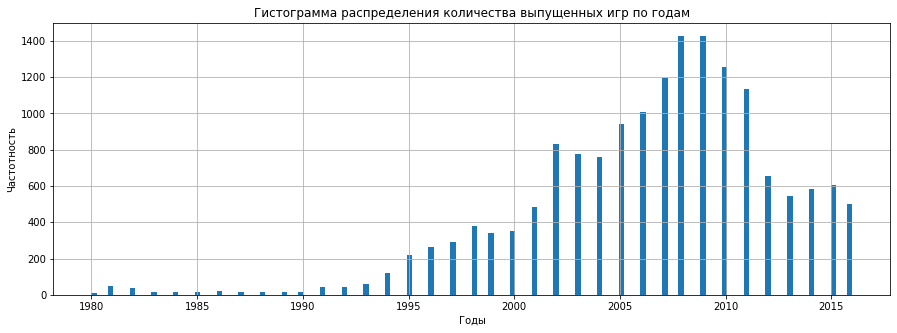

In [8]:
# Посчитаем, сколько игр выпускалось в разные годы.
games_by_year = data.pivot_table(
    index='year_of_release',
    values='name', 
    aggfunc='count'
)
games_by_year.columns = ['games_number']
display(games_by_year)
data['year_of_release'].plot(kind='hist',
                             bins=140,
                             grid=True,
                             figsize=(15,5))
plt.title('Гистограмма распределения количества выпущенных игр по годам')
plt.xlabel('Годы')
plt.ylabel('Частотность')
plt.show()

In [9]:
# Посмотрим, как менялись продажи по платформам.
sales_by_platforms = data.pivot_table(
    index='platform',
    values=['na_sales', 
            'eu_sales', 
            'jp_sales', 
            'other_sales',
            'sales_total'], 
    aggfunc='sum'
).sort_values('sales_total', ascending=False)
display(sales_by_platforms)
# Оставим 10 самых коммерчески успешных платформ.
top_10_platforms = sales_by_platforms.loc[
    sales_by_platforms['sales_total'] >= 259
].reset_index()
display(top_10_platforms)
# Зафиксируем Series-объект с названиями 
# самых коммерчески успешных платформ.
top_10_list = top_10_platforms['platform']
display(top_10_list)

,eu_sales,jp_sales,na_sales,other_sales,sales_total
platform,,,,,
PS2,339.29,139.20,583.84,193.44,1255.77
X360,270.76,12.43,602.47,85.76,971.42
PS3,330.29,80.19,393.49,135.68,939.65
Wii,262.21,69.33,496.90,79.07,907.51
DS,188.89,175.55,382.40,59.26,806.10
PS,213.61,139.82,336.52,40.91,730.86
GBA,75.25,47.33,187.54,7.73,317.85
PS4,141.09,15.96,108.74,48.35,314.14
PSP,66.68,76.78,109.17,41.42,294.05


,platform,eu_sales,jp_sales,na_sales,other_sales,sales_total
0,PS2,339.29,139.20,583.84,193.44,1255.77
1,X360,270.76,12.43,602.47,85.76,971.42
2,PS3,330.29,80.19,393.49,135.68,939.65
3,Wii,262.21,69.33,496.90,79.07,907.51
4,DS,188.89,175.55,382.40,59.26,806.10
5,PS,213.61,139.82,336.52,40.91,730.86
6,GBA,75.25,47.33,187.54,7.73,317.85
7,PS4,141.09,15.96,108.74,48.35,314.14
8,PSP,66.68,76.78,109.17,41.42,294.05
9,PC,142.44,0.17,94.53,22.38,259.52


0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     GBA
7     PS4
8     PSP
9      PC
Name: platform, dtype: object

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN


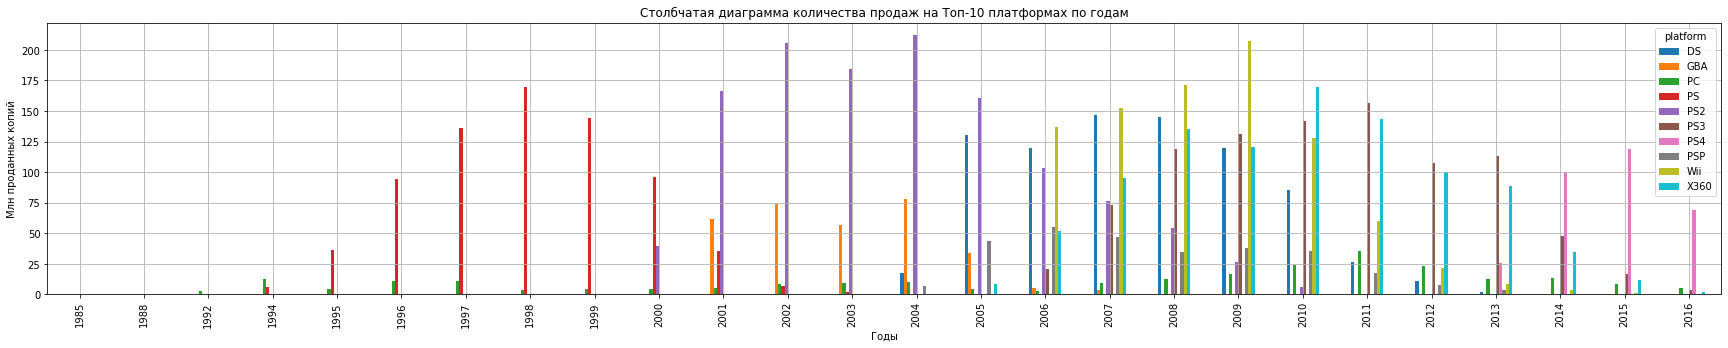

In [10]:
# Построим распределение продаж по годам 
# для каждой из 10 самых успешных платформ.
data_top_10_platforms = data.loc[
    data['platform'].isin(top_10_list)
]
top_10_platforms_by_year = data_top_10_platforms.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='sales_total', 
    aggfunc='sum'
)
display(top_10_platforms_by_year)
top_10_platforms_by_year.plot(
    kind='bar', 
    grid=True,
    figsize=(30,5)
)
plt.title('Столбчатая диаграмма количества продаж' + 
          ' на Топ-10 платформах по годам')
plt.xlabel('Годы')
plt.ylabel('Млн проданных копий')
plt.show()

### Промежуточный вывод № 1

1. Мы проанализировали количество выпущенных игр по годам. Получилось скошенное влево нормальное распределение. Начиная с 1980 года по 1992 количество выпущенных игр держалось в среднем на одном уровне, и, начиная с 1993 года, в среднем неуклонно росло вплоть до 2008 года (максимальное значение составило 1427 игр). После 2008 года количество выпускаемых игр начало снижаться. Можно предположить, что количество игр упало из-за развития многопользовательских онлайн режимов существующих игр, в связи с чем, вероятно, отпала потребность в регулярном частом выпуске игр.  
Данные за все периоды важны для выявления закономерности выпуска новых консолей, а также для расчета предположительной продолжительности "коммерческой жизни" игровой платформы.
2. Мы рассмотрели список количества проданных игр по консолям, и составили рейтинг из Топ-10 коммерческих успешных платформ. В него вошли (в порядке убывания):
  1. PS2
  2. X360
  3. PS3
  4. Wii
  5. DS
  6. PS
  7. GBA
  8. PS4
  9. PSP
  10. PC
3. Мы построили столбчатую диаграмму количества проданных игр на консолях из нашего рейтинга Топ-6 и рассмотрели данное распределение в разбивке по годам. Мы выявили:
  * Игры на PS продавались с 1994 по 2003 год (**10 лет**)
  * Игры на PS2 продавались с 2000 по 2011 год (**12 лет**)
  * Игры на DS продавались с 2004 по 2013 год (**10 лет**)
  * Игры на X360 продавались с 2005 по 2016 год (**12 лет**)
  * Игры на Wii продавались с 2006 по 2016 год (**11 лет**)
  * Игры на PS3 продавались с 2006 по 2016 год (**11 лет**)
  * Игры на PC продаются давно, можно сказать, что они были всегда, но существенные продажи были с 2007 по 2016 год (**10 лет**)
  * Значительные продажи игры на PSP показали с 2004 по 2013 год (**10 лет**)
  * Игры на PS4 начали продаваться в 2013 году. По состоянию на 2016 год эта консоль является лидером по продажам игр, несмотря на пройденный пик в 2015 году
  * Игры на GBA продавались с 2001 по 2007 (**6 лет**).

**Вывод: можно предположить, что "коммерческий срок жизни" игровой платформы составляет в среднем 10 лет.**  
  
  4. Изучая построенную столбчатую диаграмму можно заметить периодичность выпуска новых игровых платформ.
   * PS2 вышла через 7 лет после выхода PS. Продажи на PS прекратились через 4 года после выхода PS2.  
   * PS3, как и Wii вышла через 7 лет после выхода PS2. Главный конкурент PS3 X360 вышла на год раньше. Продажи на PS2 прекратились через 6 лет после выхода PS3.
   * PS4 вышла через 8 лет после выхода PS3. Продажи на PS3 по состоянию на 2016 год достигли своего минимума (через 4 года после выхода PS4)  
   * На рынке портативных консолей чуть-чуть иначе. DS и PSP вышли через 4 года после GBA. Продажи на GBA прекратились через 4 года после выхода DS и PSP.

**Вывод: можно предположить, что новые модели платформы появляются каждые 7-8 лет. Также есть основания полагать, что с момента выхода игр на новых платформах до прекращения продаж игр для платформ предыдущего поколения проходит 4 года.**  
На основании полученных выводов нам предстоит выбрать актуальный период, на основании которого мы будем планировать рекламную компанию на 2017 год.  
**В качестве актуального периода мы выбираем период с 2013 по 2016 гг. по следующим причинам:**
 1. После существенного падения продаж игр в период с 2009 по 2012 гг. мы наблюдаем стабилизацию количества продаваемых копий игр. В среднем продается 558 млн копий игр в период с 2013 по 2016 гг.
 2. В 2013 году на рынок поступили флагманские модели игровых платформ от лидирующих производителей Sony и Microsoft: PS4 и Xbox One соответственно. Это значит, что именно с 2013 года предположительно начинается новый 10-летний цикл продаж игр для этих платформ. Также это значит, что через 7 лет, в 2020 году, предположительно будут выпущены платформы нового поколения (*примечание автора проекта: к слову, в 2020 году действительно вышли платформы нового поколения PS5 и Xbox Series X*)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


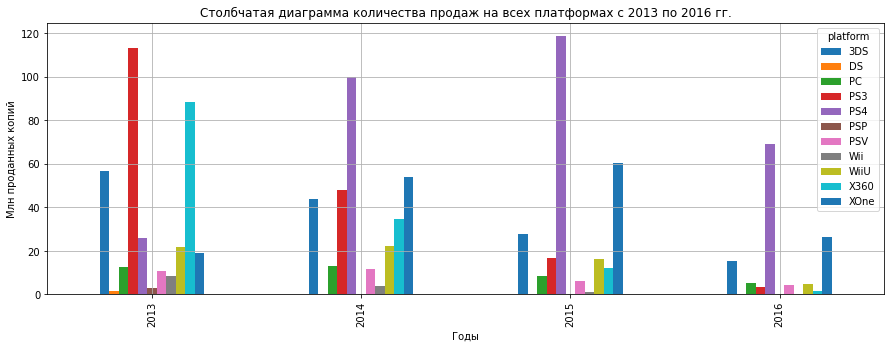

In [12]:
# Возьмем срез данных с 2013 по 2016 года.
data_actual = data.loc[
    data['year_of_release'] >= 2013
].reset_index(drop=True)
# В столбце year_of_release пропусков больше нет. 
# Переведем его формат в int.
data_actual['year_of_release'] = data_actual[
    'year_of_release'
].astype(int)
# Выясним, какие платформы лидируют по продажам, растут или падают.
data_actual_by_platform = data_actual.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='sales_total', 
    aggfunc='sum'
)
display(data_actual_by_platform)
data_actual_by_platform.plot(
    kind='bar', grid=True,
figsize=(15,5))
plt.title('Столбчатая диаграмма количества продаж' +
          ' на всех платформах с 2013 по 2016 гг.')
plt.xlabel('Годы')
plt.ylabel('Млн проданных копий')
plt.show()

### Промежуточный вывод № 2

Мы рассмотрели уровни продаж всех платформ в период с 2013 по 2016 гг. Опишем динамику.
* **3DS**. В 2013 году эта консоль занимала 3 место по объему продаж. К 2016 году уровень продаж стабильно падал, и в 2016 году достиг минимального значения. В 2016 году консоль по-прежнему занимает **3 место** по объему продаж.
* **DS**. В 2013 году зафиксированы последние продажи игр для данной консоли.
* **PC**. Такое ощущение, что игры для PC будут производиться в небольшом количестве, но всегда. В 2013-2014 гг. уровень продаж примерно на одном уровне и занимает 7 место. При этом в 2016 году объем продаж игр для PC занял, как ни странно, **4 место**.
* **PS3**. PS3 была лидером продаж игр в 2013 году, и постепенно к 2016 году опустилась на предпоследнее место. Ничего удивительного. В 2013 году на рынок вышла PS4.
* **PSP**. 2013 год - последний, когда было продано свыше миллиона копий игр для PSP. В 2014 и 2015 было продано 240 и 120 тысяч копий, а к 2016 году продажи прекратились.
* **PSV**. В 2013-2014 гг. Игры для PSV отметились относительно невысокими продажами. С годами они падали, и в 2016 году PSV занимает 6 место по продажам копий игр.
* **Wii**. Начиная с 2013 года продажи игр для Wii неуклонно падают. В 2016 году данная платформа занимает последнее место по продажам копий игр.
* **X360**. В 2013 году Xbox 360 занимала 2 место по продажам игр. С каждым годом продажи падали и к 2016 году данная платформа занимает предпоследнее место.
* **XOne**. В 2013 году на рынок вышла Xbox One, и вплоть до 2015 года продажи игр росли. В 2016 году продажи упали, правда платформа занимает **2 место**.
* **PS4**. В 2013 году на рынок вышла PS4, и вплоть до 2015 года продажи игр росли. В 2016 году продажи упали, но платформа уверенно занимает **1 место**.  
  
**Вывод**: На основе графика выберем несколько потенциально прибыльных платформ. Ими будут:
* PS4
* XOne
* 3DS  
  
  **Учитывая выявленные ранее закономерности, в 2017 году эти платформы будут в тройке лидеров по продажам игр. Мы предлагаем сфокусироваться именно на них.**

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2215,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01
2218,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2219,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sales_total, dtype: float64

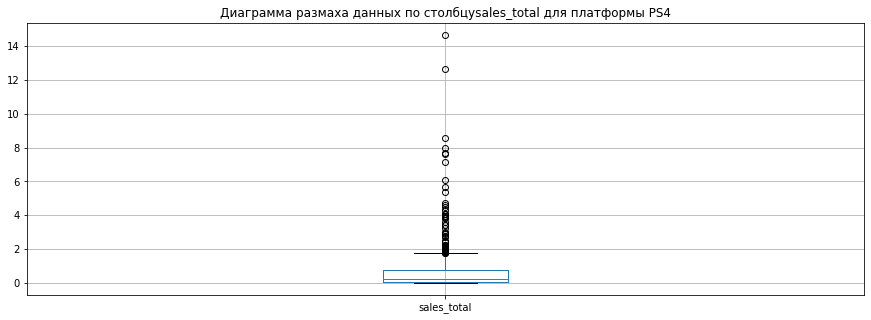

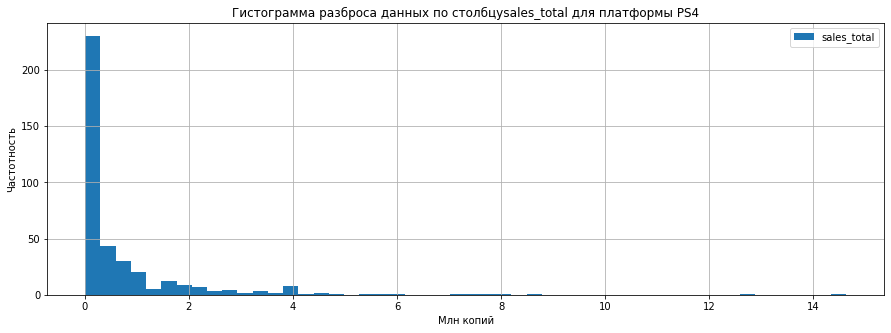

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sales_total, dtype: float64

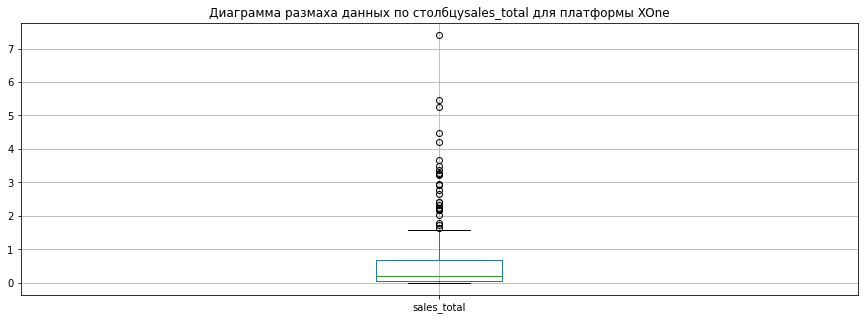

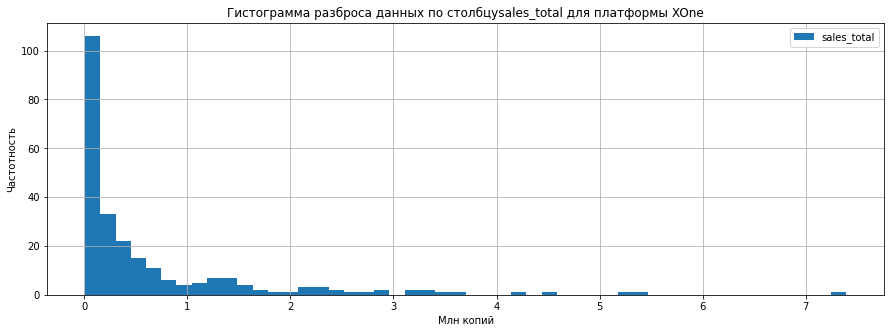

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: sales_total, dtype: float64

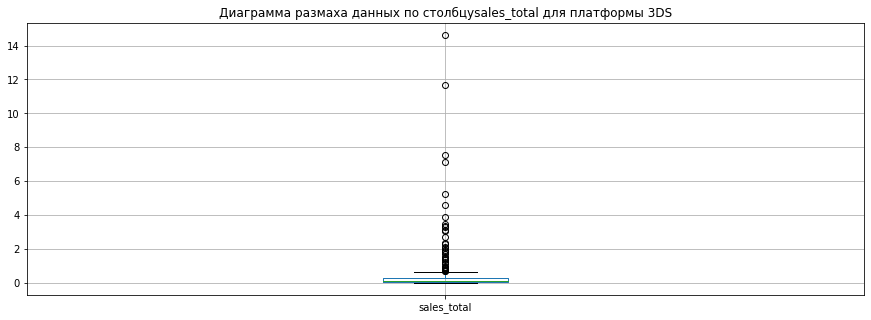

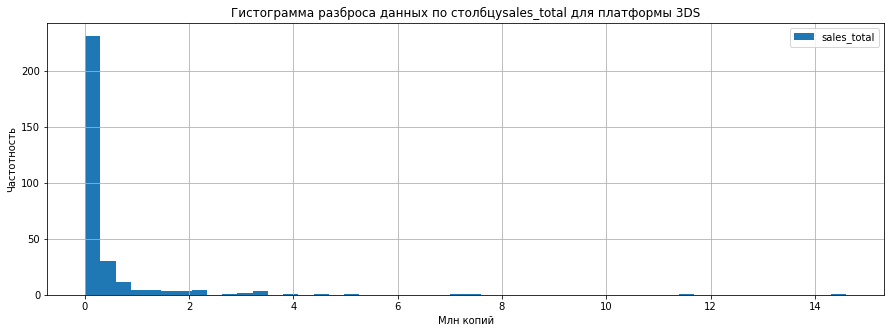

In [13]:
# Построим диаграммы размаха по глобальным продажам игр 
# в разбивке по перспективным платформам.
top3_list = ['PS4', 'XOne', '3DS']
data_actual_top = data_actual.loc[
    data_actual['platform'
               ].isin(top3_list)
]
display(data_actual_top)
for platform in top3_list:
    display(data_actual_top.loc[
        data_actual_top['platform'] == platform, 'sales_total'
    ].describe())
    data_actual_top.loc[
        data_actual_top['platform'] == platform
    ].plot(kind='box',
           y='sales_total',
           grid=True,
           figsize=(15,5))
    plt.title('Диаграмма размаха данных по столбцу' + 
              'sales_total для платформы '+ str(platform)
             )
    plt.show()
    data_actual_top.loc[
        data_actual_top['platform'] == platform].plot(
        kind='hist',
        bins=50,
        y='sales_total',
        grid=True,
        figsize=(15,5))
    plt.title('Гистограмма разброса данных по столбцу' + 
              'sales_total для платформы '+ str(platform)
             )
    plt.xlabel('Млн копий')
    plt.ylabel('Частотность')
    plt.show()


### Промежуточный вывод № 3
**Изучение глобальных продаж в разбивке по платформам**  
* **PS4**  
В среднем для PS4 продалось **801 378 копий игр**. **Медианное** значение составило **200 000 копий**. **Минимальное** количество проданных копий игр составило **10 000**. **Максимальное** 	&#8212; **14 630 000**. Оценив диаграмму размаха, а также гистограмму, можно отметить, что имеет место быть распределение Пуассона. От выбросов, отображенных на диаграмме размаха, мы избавляться не станем, так как они отображают реальность.
* **XOne**  
В среднем для XBox One продалось **645 020 копий игр**. **Медианное** значение составило **220 000 копий**. **Минимальное** количество проданных копий игр составило **10 000**. **Максимальное** 	&#8212; **7 390 000**. Оценив диаграмму размаха, а также гистограмму, можно отметить, что имеет место быть распределение Пуассона. От выбросов, отображенных на диаграмме размаха, мы избавляться не станем, так как они отображают реальность.
* **3DS**
В среднем для 3DS продалось **472 772 копий игр**. **Медианное** значение составило **90 000 копий**. **Минимальное** количество проданных копий игр составило **10 000**. **Максимальное** 	&#8212; **14 600 000**. Оценив диаграмму размаха, а также гистограмму, можно отметить, что имеет место быть распределение Пуассона. От выбросов, отображенных на диаграмме размаха, мы избавляться не станем, так как они отображают реальность.

,sales_total,critic_score,user_score
sales_total,1.00000,0.402080,0.014580
critic_score,0.40208,1.000000,0.582984
user_score,0.01458,0.582984,1.000000


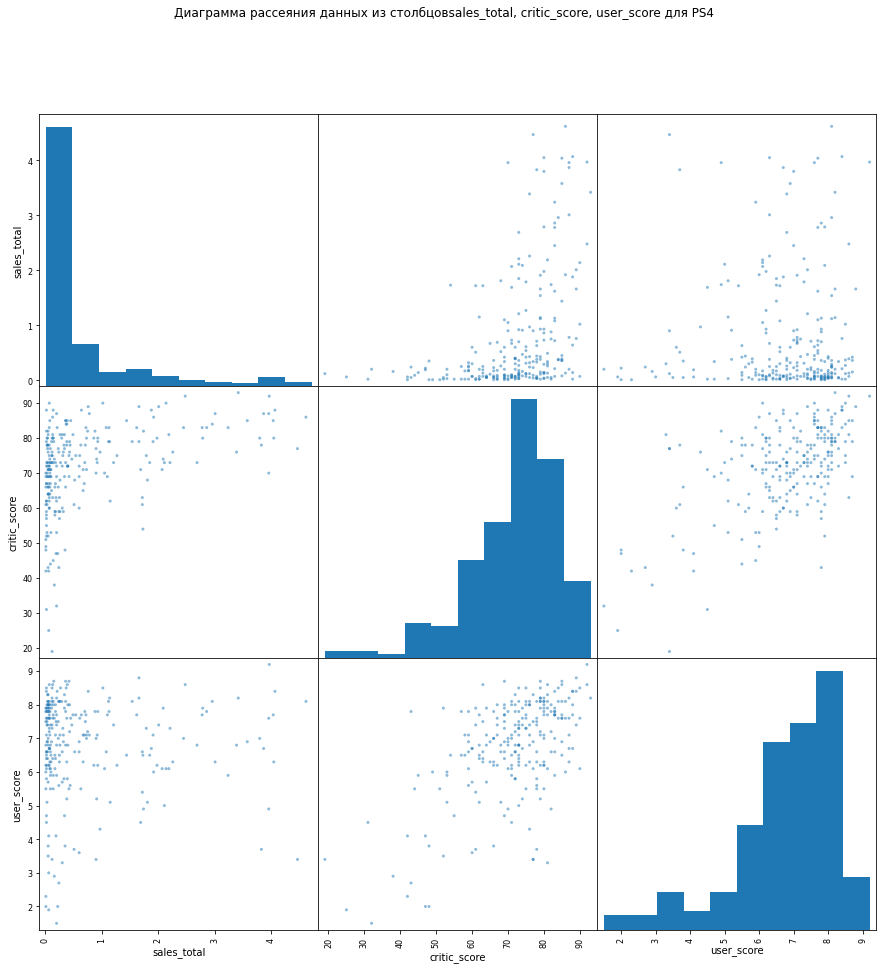

In [14]:
# Посмотрим, как влияют на продажи внутри платформы PS4 
# отзывы пользователей и критиков. 
# Построим диаграмму рассеяния и посчитаем 
# корреляцию между отзывами и продажами.
# Напишем функцию data_corr.
def data_corr(platform):
    data_actual_wo_outliers =  data_actual_top.loc[
        data_actual_top['sales_total'] <= (data_actual_top[
            'sales_total'].mean() + 3 * data_actual_top[
            'sales_total'].std()
                                          )
    ]
    pltfrm_data = data_actual_wo_outliers.loc[
        data_actual_wo_outliers['platform'] == platform
    ]
    corr_data = pltfrm_data[[
        'sales_total', 
        'critic_score', 
        'user_score'
    ]]
    pd.plotting.scatter_matrix(corr_data, figsize=(15,15))
    plt.suptitle('Диаграмма рассеяния данных из столбцов' +
                 'sales_total, critic_score, user_score для ' + 
                 str(platform)
                )
    display(corr_data.corr())

data_corr('PS4')

Теперь соотнесем полученные результаты  с продажами игр на других платформах.

,sales_total,critic_score,user_score
sales_total,1.000000,0.407140,-0.085555
critic_score,0.407140,1.000000,0.471964
user_score,-0.085555,0.471964,1.000000


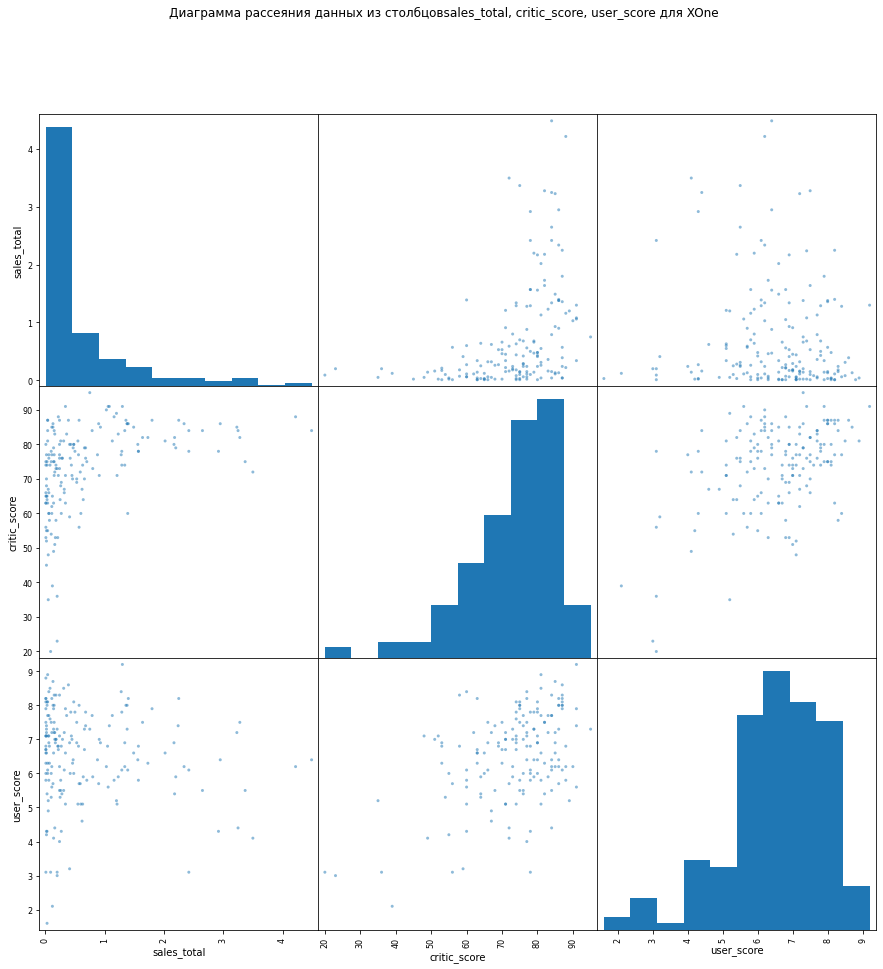

In [15]:
# Построим диаграмму рассеяния и посчитаем корреляцию 
# между отзывами и продажами для XOne.
data_corr('XOne')

,sales_total,critic_score,user_score
sales_total,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


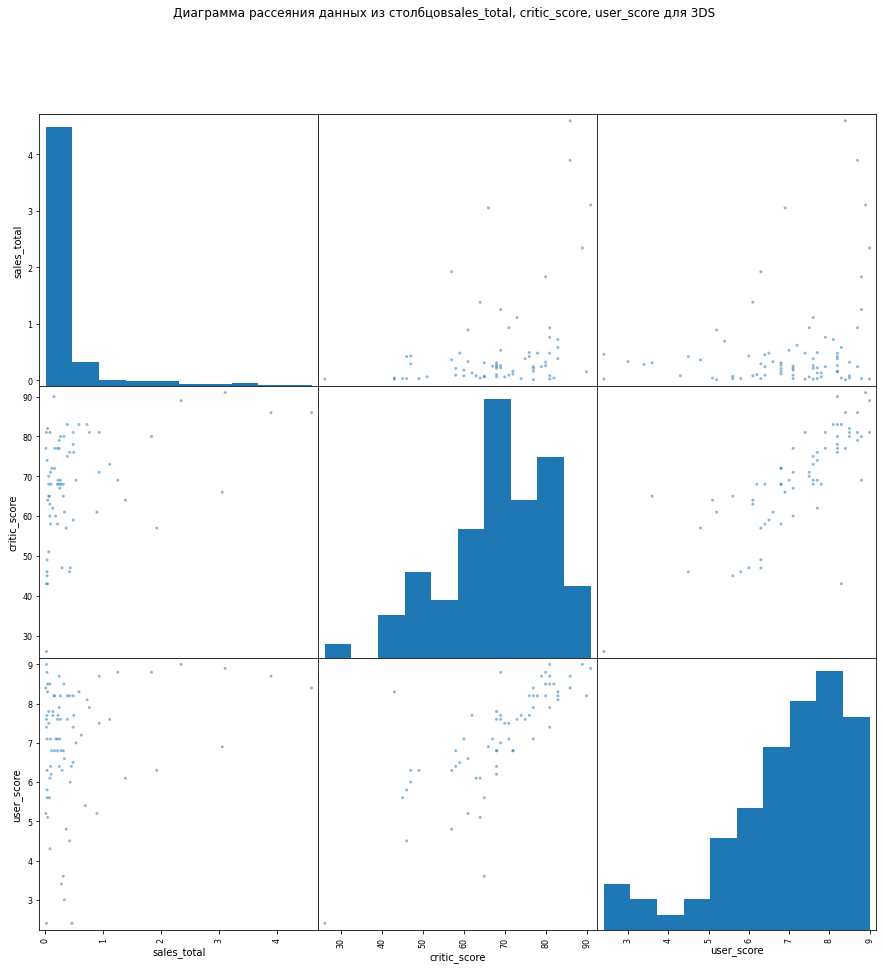

In [16]:
# Построим диаграмму рассеяния и посчитаем корреляцию 
# между отзывами и продажами для 3DS.
data_corr('3DS')

### Промежуточный вывод № 4

**Анализ влияния оценок пользователей и критиков на продажи**  
  
**PS4**  
Анализ матрицы рассеяния, а также коэффициентов корреляции Пирсона показал:  
* Существует прямая связь между объемом продаж игр и оценками критиков. Однако она не слишком сильная.
* Связь между объемом продаж игр и оценками пользователей практически отсутствует.
* Это не является предметом нашего исследования. Однако любопытно то, что существует прямая связь между оценками критиков и оценками пользователей. Правда она не слишком сильная.  
  
**XOne**  
Анализ матрицы рассеяния, а также коэффициентов корреляции Пирсона показал:  
* Существует прямая связь между объемом продаж игр и оценками критиков. Однако она не слишком сильная.
* Связь между объемом продаж игр и оценками пользователей практически отсутствует.
* Это не является предметом нашего исследования. Однако любопытно то, что существует прямая связь между оценками критиков и оценками пользователей. Правда она не слишком сильная.  
  
**3DS**  
Анализ матрицы рассеяния, а также коэффициентов корреляции Пирсона показал:  
* Существует прямая связь между объемом продаж игр и оценками критиков. Однако она не слишком сильная.
* Существует незначительная прямая связь между объемом продаж игр и оценками пользователей.

**Вывод:**   
1. Мы определили, что для PS4 существует прямая связь между объемом продаж игр и оценками критиков. Она не слишком сильная, но она есть, чего не скажешь об оценках пользователей. Связь между объемом продаж игр и оценками пользователей практически отсутствует.
2. Проведя анализ влияния оценок пользователей и критиков на продажи игр для XOne, мы отметили схожесть результатов анализа с результатами PS4. Для XOne существует прямая связь между объемом продаж игр и оценками критиков. Она не слишком сильная, но она есть, чего не скажешь об оценках пользователей. Связь между объемом продаж игр и оценками пользователей практически отсутствует.
3. Результаты анализа влияния оценок пользователей и критиков на продажи игр для 3DS нас удивили. Помимо умеренной прямой связи объемов продаж с оценками критиков, существует и незначительная прямая связь объемов продаж с оценками пользователей.

In [17]:
# Рассмотрим общее распределение игр по жанрам.
data_actual_top_by_genre = (
    data_actual_top.pivot_table(index='genre', 
                                values='sales_total', 
                                aggfunc=['count','sum'])
)
data_actual_top_by_genre.columns = ['games_number', 'sales_total']
display(
    data_actual_top_by_genre.sort_values(
        'sales_total', ascending=False
    )
)

,games_number,sales_total
genre,,
Action,345,167.45
Shooter,80,148.95
Role-Playing,127,106.91
Sports,92,84.17
Misc,71,22.72
Racing,39,21.93
Fighting,32,19.31
Platform,32,17.41
Adventure,69,12.35


### Промежуточный вывод № 5

1. Анализ распределения игр по жанрам для Топ-3 платформ показал, что больше всего игр в течение актуального периода выпущено для жанра **Action** (345 игр). При этом именно этому жанру принадлежат наибольшее количество продаж &#8212; 167 450 000 копий.
2. Второе, третье и четвертое места по количеству продаж заняли **Shooter, Role-Playing и Sports** соответственно.  
3. Последние места, как по количеству игр, так и по количеству продаж, заняли жанры **Simulation, Strategy, Puzzle** (11 450 000, 2 310 000, <br>1 750 000 копий игр соответственно). Стоит отметить, что количество продаж игр этих жанров уступает самым популярным жанрам в десятки раз.  
4. Мы можем только заметить, что "жанры-чемпионы" (**Action**, **Shooter, Role-Playing и Sports**) &#8212; это жанры, в которых победа над противником обеспечивается благодаря физическому превосходству, например, лучшим прицеливанием или меньшем временем реакции. Также большую роль играют координация глаз и рук. Обычно игрок находится под давлением, и у него нет времени на вдумчивое планирование действий.  
"Жанры-аутсайдеры" (**Simulation, Strategy, Puzzle**) &#8212; это жанры игр, где необходимо применять стратегическое мышление, играть не за конкретного персонажа, а за их условные массы, к примеру, руководить строительством города или командовать целыми армиями в военных кампаниях.

### Вывод

1. Нами было выявлено, что, вероятно, "коммерческий срок жизни" игровой платформы составляет в среднем 10 лет.
2. Мы выявили, что новые модели платформы появляются каждые 7-8 лет. Также есть основания полагать, что с момента выхода игр на новых платформах до прекращения продаж игр для платформ предыдущего поколения проходит 4 года.
3. В качестве актуального периода для анализа мы выбрали период с 2013 по 2016 гг., так как опираясь на этот относительно стабильный период, можно сделать прогноз на 2017 год. Также в 2013 году на рынок вышли PS4 и Xbox One, сделав рынок более прогнозируемым на ближайшие 7 лет.  
4. Мы выбрали тройку потенциально прибыльных платформ: PS4, XOne, 3DS.
5. Мы изучили распределение данных продаж игр трех потенциально прибыльных платформ. Оно имеет характер распределения Пуассона.
6. Мы определили, что для PS4 и XOne существует прямая связь между объемом продаж игр и оценками критиков. Она не слишком сильная, но она есть, чего не скажешь об оценках пользователей. Связь между объемом продаж игр и оценками пользователей практически отсутствует. Результаты анализа влияния оценок пользователей и критиков на продажи игр для 3DS нас удивили. Помимо умеренной прямой связи объемов продаж с оценками критиков, существует и незначительная прямая связь объемов продаж с оценками пользователей.
7. Мы выяснили, что больше всего игр в течение актуального периода выпущено для жанров **Action**, **Shooter, Role-Playing и Sports**. Эти жанры отличает наличие одного героя, а также способ обеспечения победы: физическое превосходство, координация глаз и рук. Последние места, как по количеству игр, так и по количеству продаж, заняли жанры **Simulation, Strategy, Puzzle**. Это жанры игр, где необходимо применять стратегическое мышление, играть не за конкретного персонажа, а за их условные массы, руководить ими.

## Составление информационного портрета пользователя каждого региона

In [18]:
# Определим Топ-5 популярных платформ для трех регионов: 
# Северная Америка, Европа, Япония.
top_platforms = data_actual.pivot_table(
    index='platform', 
    values=[
        'na_sales',
        'eu_sales', 
        'jp_sales'
    ], 
    aggfunc='sum'
).reset_index()
# Будем работать с этой таблицей.
display(top_platforms)

,platform,eu_sales,jp_sales,na_sales
0,3DS,30.96,67.81,38.20
1,DS,0.85,0.00,0.57
2,PC,25.36,0.00,11.11
3,PS3,67.81,23.35,63.50
4,PS4,141.09,15.96,108.74
5,PSP,0.17,3.29,0.00
6,PSV,6.10,18.59,5.04
7,Wii,5.93,0.05,6.56
8,WiiU,19.85,10.88,29.21
9,X360,42.52,0.51,81.66


In [19]:
# Напишем программу для определения Топ-5 
# платформ и их долей продаж.
def top_platform(region_column):
    top5 = top_platforms[
        ['platform', region_column]
    ].sort_values(
        by=region_column, 
        ascending=False).reset_index(drop=True).loc[:4]
    top5.loc[5, region_column] = top5[region_column].sum()
    top5.rename(index={5: 'total'}, inplace=True)
    top5['share ' + str(region_column)] = (
        top5[region_column] / top5.loc['total', region_column]
    )
    top5['platform'] = top5['platform'].fillna('-')
    display(top5)

In [20]:
# Определим Топ-5 платформ и их доли продаж. Начнем с Северной Америки.
top_platform('na_sales')

,platform,na_sales,share na_sales
0,PS4,108.74,0.282280
1,XOne,93.12,0.241732
2,X360,81.66,0.211983
3,PS3,63.50,0.164841
4,3DS,38.20,0.099164
total,-,385.22,1.000000


In [21]:
# Определим Топ-5 платформ Европы и их доли продаж.
top_platform('eu_sales')

,platform,eu_sales,share eu_sales
0,PS4,141.09,0.422463
1,PS3,67.81,0.203042
2,XOne,51.59,0.154475
3,X360,42.52,0.127317
4,3DS,30.96,0.092703
total,-,333.97,1.000000


In [22]:
# Определим Топ-5 платформ Японии и их доли продаж.
top_platform('jp_sales')

,platform,jp_sales,share jp_sales
0,3DS,67.81,0.496449
1,PS3,23.35,0.170950
2,PSV,18.59,0.136101
3,PS4,15.96,0.116846
4,WiiU,10.88,0.079654
total,-,136.59,1.000000


### Промежуточный вывод № 1

**Северная Америка**  
Топ-5 платформ:
* PS4, 108 740 000 копий. 28,2 %
* XOne, 93 120 000 копий. 24,2 %
* X360, 81 660 000 копий. 21,2 %
* PS3, 63 500 000 копий. 16,5 %
* 3DS, 38 200 000 копий. 9,9 %  
  
**Европа**  
Топ-5 платформ:
* PS4, 141 090 000 копий. 42,2 %
* PS3, 67 810 000 копий. 20,3 %
* XOne, 51 590 000 копий. 15,4 %
* X360, 42 520 000 копий. 12,7 %
* 3DS, 30 960 000 копий. 9,4 %  
  
**Япония**  
Топ-5 платформ:
* 3DS, 67 810 000 копий. 49,6 %
* PS3, 23 350 000 копий. 17,1 %
* PSV, 18 590 000 копий. 13,6 %
* PS4, 15 960 000 копий. 11,7 %
* WiiU, 10 880 000 копий. 8,0 %  
  
**Отличия в долях продаж**
1. Для Северной Америки характерно довольно-таки равномерное, "спокойное" распределение долей продаж игр по платформам. Явно доминирующей платформы нет. Доли первых трех мест составили 28,2 %, 24,2 %, 21,2 % (PS4, XOne, X360 соответственно). Доли четвертого и пятого места составили 16,5 % и 9,9 % (PS3, 3DS соответственно).
2. В Европе образовался лидер, и это PS4. При количестве продаж 141 090 000 копий, доля этой платформы составляет 42,2 %. Второе место у PS3 с долей 20,3 %. Места с третьего по пятое расположились относительно равномерно: 15,4 %, 12,7 %, 9,4 % (XOne, X360, 3DS соответственно).  
3. В Японии есть явный, доминирующий лидер. Практически каждая вторая игра была куплена для платформы 3DS (67 810 000 копий с долей 49,6 %). Места со 2 по 5 расположились относительно равномерно: 17,1 %, 13,6 %, 11,7 %, 8 % (PS3, PSV, PS4, WiiU соответственно).  

In [23]:
# Определим Топ-5 популярных жанров для трех регионов: 
# Северная Америка, Европа, Япония.
top_genres = data_actual.pivot_table(
    index='genre', 
    values=[
        'na_sales',
        'eu_sales', 
        'jp_sales'
    ], 
    aggfunc='sum'
).reset_index()
# Будем работать с этой таблицей.
display(top_genres)

,genre,eu_sales,jp_sales,na_sales
0,Action,118.13,40.49,126.05
1,Adventure,8.25,5.82,7.14
2,Fighting,8.55,7.65,15.55
3,Misc,20.04,9.20,27.49
4,Platform,15.58,4.79,18.14
5,Puzzle,1.00,1.18,0.83
6,Racing,20.19,2.30,12.96
7,Role-Playing,36.97,51.04,46.40
8,Shooter,87.86,6.61,109.74
9,Simulation,10.92,4.52,4.86


In [24]:
# Напишем программу для определения Топ-5 жанров 
# и их долей продаж.
def top_genre(region_column):
    top5 = top_genres[
        ['genre', region_column]
    ].sort_values(
        by=region_column, 
        ascending=False).reset_index(drop=True).loc[:4]
    top5.loc[5, region_column] = top5[region_column].sum()
    top5.rename(index={5: 'total'}, inplace=True)
    top5['share ' + str(region_column)] = (
        top5[region_column] / top5.loc['total', region_column]
    )
    top5['genre'] = top5['genre'].fillna('-')
    display(top5)

In [25]:
# Посчитаем Топ-5 жанров и их долей продаж для Северной Америки.
top_genre('na_sales')

,genre,na_sales,share na_sales
0,Action,126.05,0.336178
1,Shooter,109.74,0.292679
2,Sports,65.27,0.174077
3,Role-Playing,46.40,0.123750
4,Misc,27.49,0.073316
total,-,374.95,1.000000


In [26]:
# Посчитаем Топ-5 жанров и их долей продаж для Европы.
top_genre('eu_sales')

,genre,eu_sales,share eu_sales
0,Action,118.13,0.364970
1,Shooter,87.86,0.271449
2,Sports,60.52,0.186981
3,Role-Playing,36.97,0.114221
4,Racing,20.19,0.062378
total,-,323.67,1.000000


In [27]:
# Посчитаем Топ-5 жанров и их долей продаж для Японии.
top_genre('jp_sales')

,genre,jp_sales,share jp_sales
0,Role-Playing,51.04,0.443865
1,Action,40.49,0.352118
2,Misc,9.20,0.080007
3,Fighting,7.65,0.066528
4,Shooter,6.61,0.057483
total,-,114.99,1.000000


**Северная Америка**  
Топ-5 жанров:
* Action, 126 050 000 копий. 33,6 %
* Shooter, 109 740 000 копий. 29,3 %
* Sports, 65 270 000 копий. 17,4 %
* Role-Playing, 46 400 000 копий. 12,4 %
* Misc, 27 490 000 копий. 7,3 %  
  
**Европа**  
Топ-5 жанров:
* Action, 118 130 000 копий. 36,5 %
* Shooter, 87 860 000 копий. 27,1 %
* Sports, 60 520 000 копий. 18,7 %
* Role-Playing, 36 970 000 копий. 11,4 %
* Racing, 20 190 000 копий. 6,3 %  
  
**Япония**  
Топ-5 жанров:
* Role-Playing, 51 040 000 копий. 44,4 %
* Action, 40 490 000 копий. 35,2 %
* Misc, 9 200 000 копий. 8 %
* Fighting, 7 650 000 копий. 6,7 %
* Shooter, 6 610 000 копий. 5,7 %  
  
**Отличия в долях продаж**
1. У Северной Америки и Европы показатели долей довольно похожи + первые четыре места рейтинга совпадают.  
1 место Action (33,6 % Северная Америка, 36,5 % Европа), 2 место Shooter (29,3 % Северная Америка, 27,1 % Европа),  
3 место Sports (17,4 % Северная Америка, 18,7 % Европа), 4 место Role-Playing (12,4 % Северная Америка, 11,4 % Европа).  
5 место в Северной Америке занимает Misc (7,3 %). А в Европе Racing (6,3 %).
2. В Японии вновь есть явный, доминирующий лидер. Жанр Role-Playing занимает первое место с долей продаж 44,4 %. Второе место у Action с 35,2 %. Оставшиеся три жанра получили меньше 10 %: Misc (8 %), Fighting (6,7 %), Shooter (5,7 %).

In [28]:
# Разберемся, влияет ли рейтинг ESRB на продажи в отдельном регионе.
# Будем работать вот с этой таблицей.
# Заменим NaN-значения маркером X, чтобы проанализировать 
# распределение продаж с пропущенным рейтингом по регионам.
data_actual_copy = data_actual.copy()
data_actual_copy['rating'] = data_actual_copy['rating'].fillna('X')
data_rating = data_actual_copy.pivot_table(
    index='rating', 
    values=[
        'na_sales',
        'eu_sales', 
        'jp_sales'
    ], 
    aggfunc='sum'
).reset_index()
display(data_rating)

,rating,eu_sales,jp_sales,na_sales
0,E,83.36,15.14,79.05
1,E10+,42.69,5.89,54.24
2,M,145.32,14.11,165.21
3,T,41.95,20.59,49.79
4,X,78.91,85.05,89.42


In [29]:
# Напишем программу для определения долей 
# продаж в зависимости от рейтинга.
def rating(region_column):
    rating_d = data_rating[[
        'rating', region_column
    ]].reset_index(drop=True)
    rating_d.loc[5, region_column] = rating_d[region_column].sum()
    rating_d.rename(index={5: 'total'}, inplace=True)
    rating_d['share ' + str(region_column)] = (
        rating_d[region_column] / rating_d.loc['total', region_column]
    )
    rating_d['rating'] = rating_d['rating'].fillna('-')
    display(rating_d)

In [30]:
# Посчитаем долю продаж в зависимости от рейтинга в Северной Америке.
rating('na_sales')

,rating,na_sales,share na_sales
0,E,79.05,0.180599
1,E10+,54.24,0.123918
2,M,165.21,0.377442
3,T,49.79,0.113751
4,X,89.42,0.204291
total,-,437.71,1.000000


In [31]:
# Посчитаем долю продаж в зависимости от рейтинга в Европе.
rating('eu_sales')

,rating,eu_sales,share eu_sales
0,E,83.36,0.212528
1,E10+,42.69,0.108839
2,M,145.32,0.370497
3,T,41.95,0.106953
4,X,78.91,0.201183
total,-,392.23,1.000000


In [32]:
# Посчитаем долю продаж в зависимости от рейтинга в Японии.
rating('jp_sales')

,rating,jp_sales,share jp_sales
0,E,15.14,0.107544
1,E10+,5.89,0.041838
2,M,14.11,0.100227
3,T,20.59,0.146257
4,X,85.05,0.604134
total,-,140.78,1.000000


### Промежуточный вывод № 2

Мы рассчитали доли продаж игр в зависимости от их ESRB-рейтинга.  
Для рейтингов E и E10+ результаты расчета в Северной Америке и Европе не сильно отличаются друг от друга. А вот в Японии показатели примерно в 2 раза ниже: 
* Северная Америка 18 %, 12,4 % соответственно
* Европа 21,3 %, 10,0 % соответственно
* Япония 10,8 %, 4,1 % соответственно  
  
Наше внимание приковали рейтинги M и T. Если у Северной Америки и Европы доля этих рейтингов примерно одинаковая (37,7 %, 11,3 % у Америки и 37 % и 10,7 % у Европы), то у Японии доля рейтинга M составляет 10 %, а у рейтинга T 14,6 %.  
**Вероятно, в Японии рейтинг M (только для взрослых) отталкивает пользователя от покупки игры, в то время как рейтинг T (для подростков) наоборот привлекает.**  
  
Также крайне любопытно взглянуть на распределение долей продаж с пропущенным значением в рейтинге ESRB, которые мы пометили маркером X.  
В Северной Америке и Европе одинаковая доля продаж с пропущенным рейтингом &#8212; 20 %. В Японии же доля продаж с пропущенным рейтингом составляет аж 60 %.  
**Рейтинг ESRB обязателен для продажи игр через ритейл в США и Канаде. Купить коробку с игрой без присвоенного ей рейтинга в США и Канаде нельзя. Отстутствие данных о рейтинге в датасете говорит о том, что просто на момент создания датасета у компилятора не было этих данных.  
Как можно объяснить 60 % долю продаж игр с пропущенным рейтингом в Японии? Вероятно, такую долю можно объяснить тем, <br> что ESRB &#8212; это организация, ведущая свою деятельность только на территоии США и Канады. В Японии же есть своя организация, оценивающая возрастной рейтинг CERO. Может быть, высокие продажи игр с пропущенным рейтингом ESRB в Японии обусловленны тем. что у этих игр есть рейтинг CERO, и у него не такой жесткий рейтинг, как у ESRB или PEGI, что позволяет большему количиству молодых японцев покупать игры.**

### Вывод

**Топ-5 платформ**
1. Для Северной Америки характерно довольно-таки равномерное, "спокойное" распределение долей продаж игр по платформам. Явно доминирующей платформы нет. Доли первых трех мест составили 28,2 %, 24,2 %, 21,2 % (PS4, XOne, X360 соответственно). Доли четвертого и пятого места составили 16,5 % и 9,9 % (PS3, 3DS соответственно).
2. PS4 является лидером в Европе. При количестве продаж 141 090 000 копий, доля этой платформы составляет 42,2 %. Второе место у PS3 с долей 20,3 %. Места с третьего по пятое расположились относительно равномерно: 15,4 %, 12,7 %, 9,4 % (XOne, X360, 3DS соответственно).  
3. В Японии есть явный, доминирующий лидер. Практически каждая вторая игра была куплена для платформы 3DS (67 810 000 копий с долей 49,6 %). Места со 2 по 5 расположились относительно равномерно: 17,1 %, 13,6 %, 11,7 %, 8 % (PS3, PSV, PS4, WiiU соответственно).  
**Топ-5 жанров**
1. У Северной Америки и Европы показатели долей довольно похожи + первые четыре места рейтинга совпадают. 
* 1 место Action (33,6 % Северная Америка, 36,5 % Европа) 
* 2 место Shooter (29,3 % Северная Америка, 27,1 % Европа)
* 3 место Sports (17,4 % Северная Америка, 18,7 % Европа)
* 4 место Role-Playing (12,4 % Северная Америка, 11,4 % Европа)
* 5 место в Северной Америке занимает Misc (7,3 %). А в Европе Racing (6,3 %)
2. В Японии вновь есть явный, доминирующий лидер. Жанр Role-Playing занимает первое место с долей продаж 44,4 %. Второе место у Action с 35,2 %. Оставшиеся три жанра получили меньше 10 %: Misc (8 %), Fighting (6,7 %), Shooter (5,7 %).
**Влияние рейтингов ESRB на продажи**  
Для рейтингов E и E10+ результаты расчета во всех трех регионах не сильно отличаются друг от друга: 
* Северная Америка 22,7 %, 15,6 % соответственно
* Европа 26,6 %, 13,6 % соответственно
* Япония 27,2 %, 10,6 % соответственно  

Наше внимание приковали рейтинги M и T. Если у Северной Америки и Европы доля этих рейтингов примерно одинаковая (47,4 %, 14,3 % у Америки и 46,4 % и 13,4 % у Европы), то у Японии доля рейтинга M составляет 25,3 %, а у рейтинга T 36,9 %.  
**Вероятно, в Японии рейтинг M (только для взрослых) отталкивает пользователя от покупки игры, в то время как рейтинг T (для подростков) наоборот привлекает.**
  

## Проверка гипотез

Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".  
У нас есть две генеральные совокупности: пользовательские рейтинги платформ Xbox One и PC 

In [33]:
# Подготовим массивы данных
# Сначала Xbox One. Сделаем срез данных и посчитаем среднее
data_xbox = data_actual.loc[
    data_actual['platform'] == 'XOne', 'user_score'
]
data_xbox_mean = data_xbox.mean()
# Теперь PC. Сделаем срез данных и посчитаем среднее.
data_pc = data_actual.loc[
    data_actual['platform'] == 'PC', 'user_score'
]
data_pc_mean = data_pc.mean()
print('Среднее значение пользовательского рейтинга' +
      ' данной выборки для Xbox One :', data_xbox_mean)
print('Срендее значение пользовательского рейтинга' + 
      ' данной выборки для PC:', data_pc_mean)

Среднее значение пользовательского рейтинга данной выборки для Xbox One : 6.521428571428572
Срендее значение пользовательского рейтинга данной выборки для PC: 6.269677419354839


Сформулируем нулевую гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC не различаются.  
Сформулируем альтернативную гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC различаются.

In [34]:
# Зададим критический уровень статистической значимости.
alpha = .05
results = st.ttest_ind(
    data_xbox, data_pc, equal_var=False, nan_policy='omit'
)
print()
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.1475959401343003
Не получилось отвергнуть нулевую гипотезу


Проверим гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные."  
У нас есть две генеральные совокупности: пользовательские рейтинги жанров Action и Sports.

In [35]:
# Подготовим массивы данных.
# Сначала Action. Сделаем срез данных и посчитаем среднее.
data_action = data_actual.loc[
    data_actual['genre'] == 'Action', 'user_score'
]
data_action_mean = data_action.mean()
# Теперь Sports. Сделаем срез данных и посчитаем среднее.
data_sports = data_actual.loc[
    data_actual['genre'] == 'Sports', 'user_score'
]
data_sports_mean = data_sports.mean()
print('Срендее значение пользовательского рейтинга' + 
      ' данной выборки для жанра Action :', data_action_mean)
print('Срендее значение пользовательского рейтинга' + 
      ' данной выборки для жанра Sports:', data_sports_mean)

Срендее значение пользовательского рейтинга данной выборки для жанра Action : 6.837532133676093
Срендее значение пользовательского рейтинга данной выборки для жанра Sports: 5.238124999999999


Сформулируем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports не различаются.  
Сформулируем альтернативную гипотезу: Средние пользовательские рейтинги жанров Action и Sports различаются

In [36]:
# Зададим критический уровень статистической значимости.
alpha = .05
results = st.ttest_ind(
    data_action, data_sports, equal_var=False, nan_policy='omit'
)
print()
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 1.446003970070351e-20
Отвергаем нулевую гипотезу


### Вывод

Перед нами стояла задача проверить две гипотезы:  
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные

Мы определили, что обе гипотезы являются двухсторонними гипотезами о равенстве средних двух генеральных совокупностей. 
Для каждого случая мы определили нулевую и альтернативную гипотезы, и после этого провели расчет, в котором сравнили уровень p-value с уровнем значимости 5 %.  
  
**<u>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</u>**  
**$H_0$:** cредние пользовательские рейтинги платформ Xbox One и PC не различаются.  
**$H_1$:** cредние пользовательские рейтинги платформ Xbox One и PC различаются.
  
**<u>Средние пользовательские рейтинги жанров Action и Sports разные</u>**  
**$H_0$:** средние пользовательские рейтинги жанров Action и Sports не различаются.  
**$H_1$:** средние пользовательские рейтинги жанров Action и Sports различаются.  

  
**Результаты расчетов**  
* Нам не удалось отвергнуть нулевую гипотезу "cредние пользовательские рейтинги платформ Xbox One и PC не различаются", так как уровень <br> P-value оказался выше уровня значимости 5 %. **<u>По всей видимости, несмотря на разницу в средних значениях, в почти 15 % случаев такое различие получится случайно. Мы не исключаем того, что cредние пользовательские рейтинги платформ Xbox One и PC действительно не различаются.</u>** 
* Нулевая гипотеза "средние пользовательские рейтинги жанров Action и Sports не различаются" была нами отвергнута, так как уровень P-value оказался существенно ниже уровня значимости 5 %. **<u>По всей видимости, средние пользовательские рейтинги жанров Action и Sports действительно различаются.</u>**  

## Общий вывод

Наша задача заключалась в выявлении закономерностей, определяющих успешность игры. Это позволит нашему интернет-магазину сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Что нам удалость сделать?  
1. Мы изучили входной датасет, обработали его, избавившись от лишних данных и изменив тип данных в требуемом столбце. Также мы изменили регистр записи названий столбцов таблицы, чем существенно облегчили себе дальнейшую работу. Помимо этого мы рассчитали глобальные для игр, тем самым обогатив входной датасет.
2. В ходе исследовательского анализа мы выявили интересные закономерности:
 * Вероятно, "коммерческий срок жизни" игровой платформы составляет в среднем 10 лет.
 * Новые модели платформ появляются каждые 7-8 лет. Также есть основания полагать, что с момента выхода игр на новых платформах до прекращения продаж игр для платформ предыдущего поколения проходит 4 года.
3. В качестве актуального периода для анализа мы выбрали период с 2013 по 2016 гг. Это относительно стабильный период. Опираясь на него, можно сделать прогноз на 2017 год. Также в 2013 году на рынок вышли PS4 и Xbox One, сделав рынок более прогнозируемым на ближайшие 7 лет.  
4. Мы выбрали тройку потенциально прибыльных платформ: PS4, XOne, 3DS.  
5. Мы определили, что для PS4 и XOne существует прямая связь между объемом продаж игр и оценками критиков. Связь между объемом продаж игр и оценками пользователей практически отсутствует. По итогам анализа платформы 3DS, можно отметить, что помимо умеренной прямой связи объемов продаж с оценками критиков, существует и незначительная прямая связь объемов продаж с оценками пользователей.
6. Мы выяснили, что больше всего игр в течение актуального периода выпущено для жанров Action, Shooter, Role-Playing и Sports. Последние места, как по количеству игр, так и по количеству продаж, заняли жанры Simulation, Strategy, Puzzle.
7. Мы составили рейтинги Топ-5 платформ и Топ-5 жанров по объему продаж в разбивке по трем рынкам мира: Северная Америка, Европа и Япония. Вычислили доли каждой платформы и каждого жанра от общего количества рейтингов, выяснив предпочтения трех регионов.
8. Мы выявили, что в Северной Америке и Европе рейтинг ESRB примерно одинаково влияет на предпочтения пользователей. Большинство предпочитают игры рейтинга M (только для взрослых). В Японии же рейтинг M, вероятно, отталкивает пользователя от покупки игры, в то время как рейтинг T (для подростков) наоборот привлекает.
9. Мы рассмотрели две гипотезы. Мы не исключаем возможность того, что cредние пользовательские рейтинги платформ Xbox One и PC действительно не различаются. По всей видимости, средние пользовательские рейтинги жанров Action и Sports действительно различаются.  
  
Опираясь на сделанные выводы, мы можем рекомендовать нашему интернет-магазину: 
* Сфокусироваться в 2017 году на платформах PS4, XOne, 3DS. 
* При закупке игр для PS4, XOne рекомендуется опираться на оценки критиков, а при закупке игр для 3DS рекомендуется опираться кроме оценок критиков еще и на оценки пользователей.
* При продаже игр руководстоваться составленными рейтингами по платформам, жанрам в зависимости от региона. Учитывать влияние рейтинга ESRB.
* Учитывать, что cредние пользовательские рейтинги платформ Xbox One и PC могут не различаются, а средние пользовательские рейтинги жанров Action и Sports действительно различаются.  